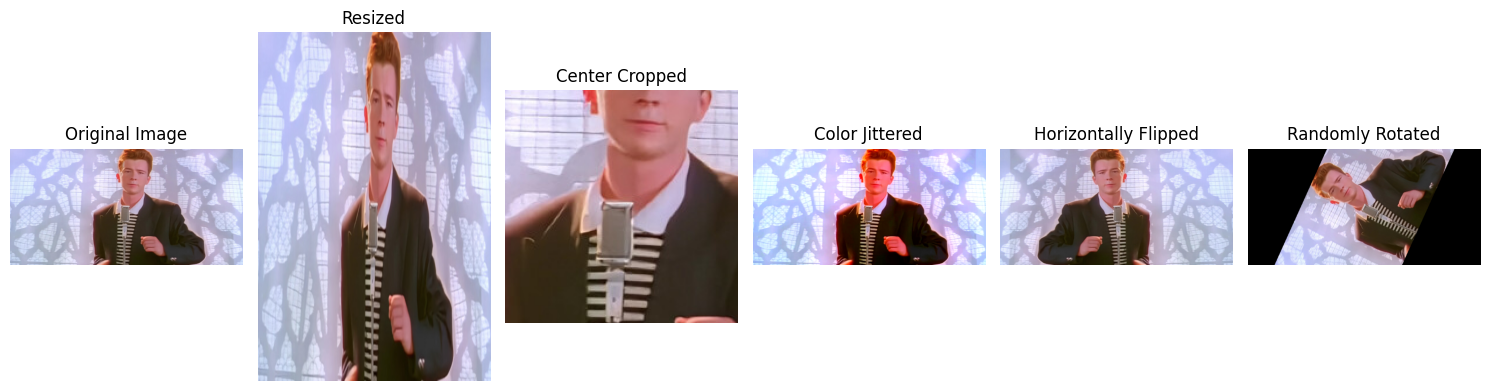

In [6]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# 函數從網址加載圖片
def load_image(url):
    response = requests.get(url)
    return Image.open(BytesIO(response.content))

# 定義變換
transforms_dict = {
    "Original Image": None,
    "Resized": transforms.Resize((1080, 720)),
    "Center Cropped": transforms.CenterCrop(200),
    "Color Jittered": transforms.ColorJitter(brightness=0.1, contrast=0.5, saturation=0.9),
    "Horizontally Flipped": transforms.RandomHorizontalFlip(p=3),
    "Randomly Rotated": transforms.RandomRotation(180)
}

# 加載圖片
img_url = 'https://www.lowyat.net/wp-content/uploads/2021/07/Rick-Astley-Never-Gonna-Give-You-Up-1-billion-views-YouTube-2-750x374.jpg'
img = load_image(img_url)

# 準備繪圖
fig, ax = plt.subplots(1, 6, figsize=(15, 5))  # 1 row，6 column

# 繪製和顯示變換後的圖像
for i, (title, transform) in enumerate(transforms_dict.items()):
    transformed_img = img
    if transform:
        transformed_img = transform(transformed_img)
    ax[i].imshow(transformed_img)
    ax[i].set_title(title)
    ax[i].axis('off')

plt.tight_layout()
plt.show()